# Japanese Used-Car Price Prediction

The japanese car price prediction is a regression problem which gives the information about the various attributes of a car like brand, model, year or make, its mileage, engine capacity, typo of transmission, 2wd or 4wd and type of fuel. The scope of this project is to predict the price of the car based on these attributes.

# Dataset Dictionary

1. Price- The sale price of the vehicle in the ad
2. Mark - The brand of car
3. Model - model of the vehicle
4. Years - The vehicle registration year
5. Mileage - miles traveled by vehicle
6. Engine_capacity - The measurement of the total volume of the cylinders in the engine
7. Transmission - The type of gearbox used by the car
8. Drive - wheel drive(2wd, 4wd and awd)
9. Hand_drive - Left-hand traffic (LHT) and right-hand traffic (RHT)
10. Fuel - The type of fuel used by the car( gasoline, diesel, hybrid, lpg and cng)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cars_japan.csv')

In [3]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
df.shape

(2318, 11)

The dataset contains 11 columns which has both numerical and categorical data types. Out of these 11 columns 5 are numerical and remaining 6 are categorical. The columns Price is the target variable. 

# EDA

In [5]:
# Checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [6]:
# Checking the dataset for null values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

There are no null values in the dataset.

In [7]:
# Checking the various datatypes in the given dataset
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

The dataset has 2 types of data, i.e. integer type and object type

In [8]:
# Checking the column names
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [9]:
# Summarizing the dataset
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


# Data Visualizations

Univariate Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

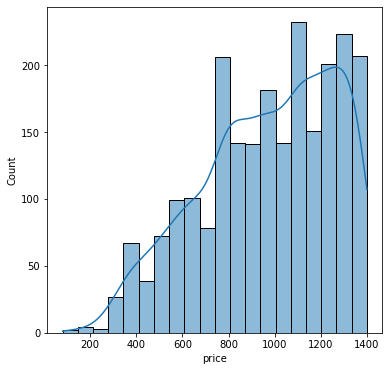

In [10]:
# Checking the distribution of the prices of the cars
plt.figure(figsize=(6,6))
sns.histplot(x=df['price'],kde=True)

In [11]:
# Checking th evarious brands of cars and seeing each numbers
df['mark'].value_counts()

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64

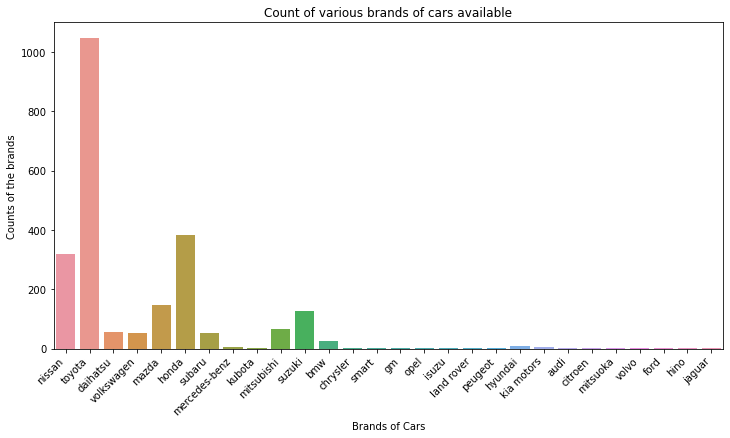

In [12]:
plt.figure(figsize=(12,6))
plt.title('Count of various brands of cars available')
sns.countplot(x=df['mark'])
plt.xlabel('Brands of Cars')
plt.ylabel('Counts of the brands')
plt.xticks(rotation =45, ha='right')
plt.show()

In [13]:
# Checking the model column
df['model'].unique()

array(['march', 'lafesta', 'avensis', 'mira', 'passat', 'bongo van',
       'step wgn', 'sambar', 'inspire', 'mercedes-benz others', 'note',
       'passo', 'impreza', 'kubota others', 'life', 'progres',
       'cube cubic', 'cube', 'a-class', 'coltplus', 'mr wagon',
       'pajero mini', 'fit', 'legacy b4', 'vitz', 'mark ii blit',
       'insight', 'move', 'tanto', 'terios kid', 'az-wagon', 'coo',
       'verisa', 'swift', 'delica d2', 'tiida', 'sienta', 'mini', 'colt',
       'platz', 'bluebird sylphy', 'eclipse', 'bb', 'moco',
       'clipper truck', 'esse', 'ek wagon', 'polo', 'x-trail',
       'atenza sport', 'ad van', 'pixis space', 'freed spike', 'stream',
       'alto', 'raum', 'wish', 'every', 'demio', 'jimny', 'premacy',
       'cr-v', 'lapin', 'delica', 'wagon r', 'lancer', 'naked', 'odyssey',
       'ractis', 'porte', 'corolla rumion', 'tiida latio', 'voxy',
       'carol', 'sunny', 'bongo truck', 'boon', 's-mx', 'pt cruiser',
       'golf', 'ad expert', 'fit hybrid', 'sere

In [14]:
# Checking the year column
df['year'].value_counts()

2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: year, dtype: int64

In [15]:
# Checking the mileage column
df['mileage'].nunique()

1367

In [16]:
# Checking the engine_capacity
df['engine_capacity'].value_counts()

1300    468
1500    433
2000    197
1000    168
660     159
       ... 
1986      1
798       1
1587      1
1270      1
1999      1
Name: engine_capacity, Length: 93, dtype: int64

In [17]:
# Checking the transmission column
df['transmission'].value_counts()

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

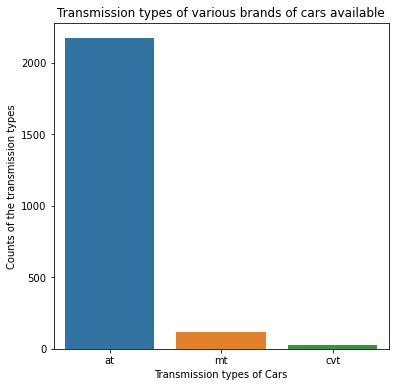

In [18]:
plt.figure(figsize=(6,6))
plt.title('Transmission types of various brands of cars available')
sns.countplot(x=df['transmission'])
plt.xlabel('Transmission types of Cars')
plt.ylabel('Counts of the transmission types')
plt.show()

In [19]:
# Checking the hand drive column whether it is a left or a right hand drive
df['hand_drive'].value_counts()

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64

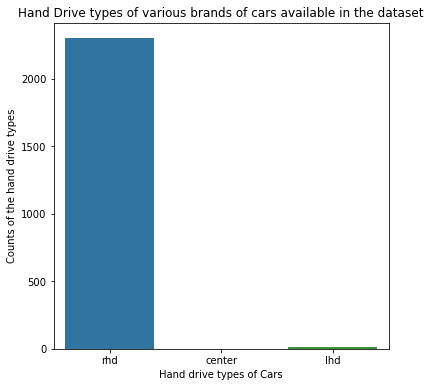

In [20]:
plt.figure(figsize=(6,6))
plt.title('Hand Drive types of various brands of cars available in the dataset')
sns.countplot(x=df['hand_drive'])
plt.xlabel('Hand drive types of Cars')
plt.ylabel('Counts of the hand drive types')
plt.show()

In [21]:
# Checking the different types of fuels
df['fuel'].value_counts()

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

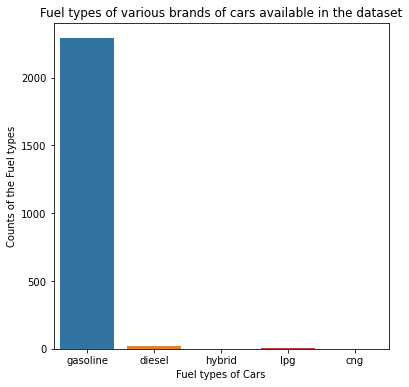

In [22]:
plt.figure(figsize=(6,6))
plt.title('Fuel types of various brands of cars available in the dataset')
sns.countplot(x=df['fuel'])
plt.xlabel('Fuel types of Cars')
plt.ylabel('Counts of the Fuel types')
plt.show()

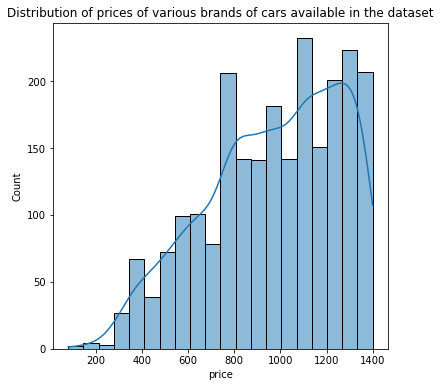

In [23]:
# Checking the distribution of the price column
plt.figure(figsize=(6,6))
plt.title('Distribution of prices of various brands of cars available in the dataset')
sns.histplot(x=df['price'],kde=True)
plt.show()

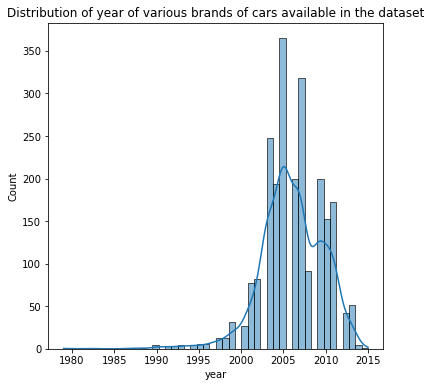

In [24]:
# Checking the distribution of the year column of cars in the dataset
plt.figure(figsize=(6,6))
plt.title('Distribution of year of various brands of cars available in the dataset')
sns.histplot(x=df['year'],kde=True)
plt.show()

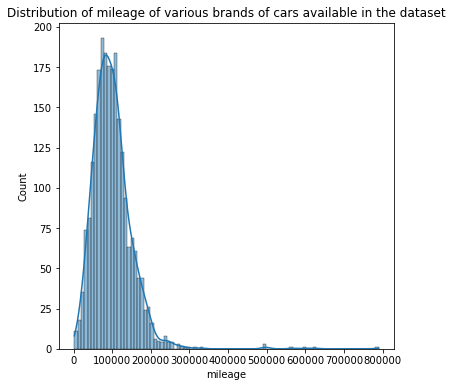

In [25]:
# Checking the distribution of the mileage in the dataset
plt.figure(figsize=(6,6))
plt.title('Distribution of mileage of various brands of cars available in the dataset')
sns.histplot(x=df['mileage'],kde=True)
plt.show()

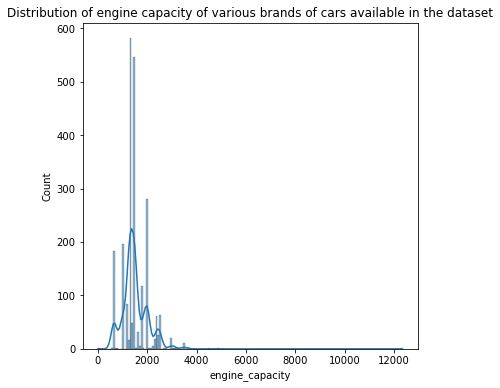

In [26]:
# Checking the distribution of the engine capacity of the cars in dataset
plt.figure(figsize=(6,6))
plt.title('Distribution of engine capacity of various brands of cars available in the dataset')
sns.histplot(x=df['engine_capacity'],kde=True)
plt.show()

We can conclude that the data id not normally distributed and some of the columns contain skewness.
The skewness will be removed later 

# Bi-Variate Analysis

In [27]:
df.head(1)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline


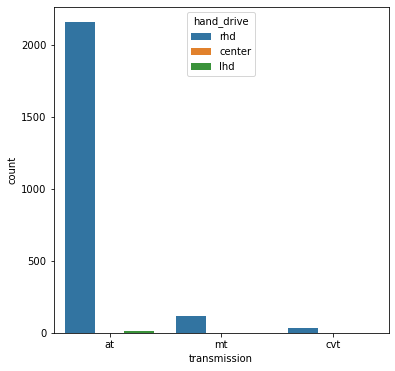

In [28]:
# Transmission column on hand_drive column
plt.figure(figsize=(6,6))
sns.countplot(x=df['transmission'],hue=df['hand_drive'])
plt.show()

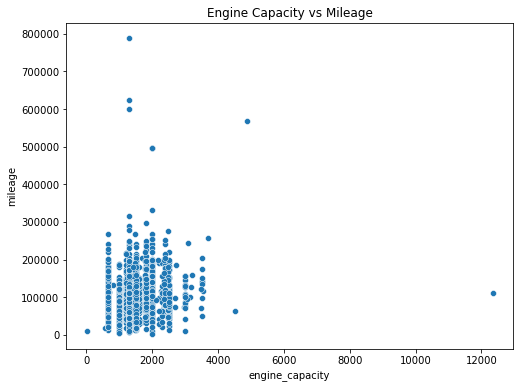

In [29]:
# mileage vs engine capacity
plt.figure(figsize=(8,6))
plt.title('Engine Capacity vs Mileage')
sns.scatterplot(x='engine_capacity',y='mileage', data=df)
plt.show()

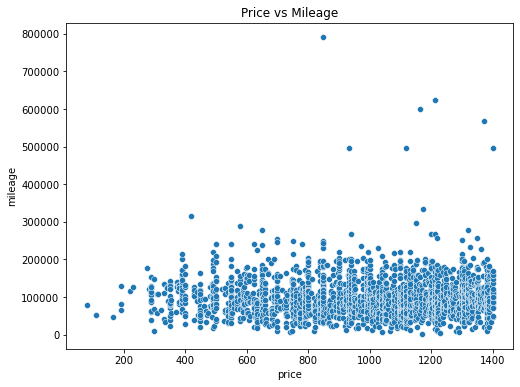

In [30]:
# mileage vs price
plt.figure(figsize=(8,6))
plt.title('Price vs Mileage')
sns.scatterplot(x='price',y='mileage', data=df)
plt.show()

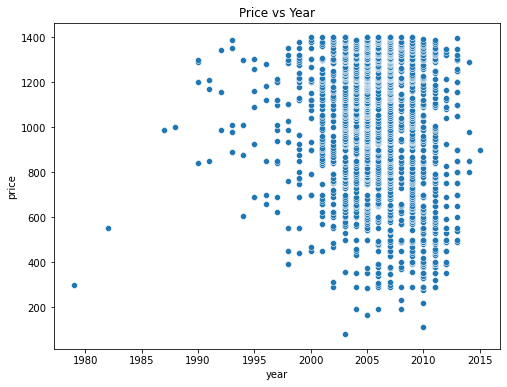

In [31]:
# price vs year
plt.figure(figsize=(8,6))
plt.title('Price vs Year')
sns.scatterplot(y='price',x='year', data=df)
plt.show()

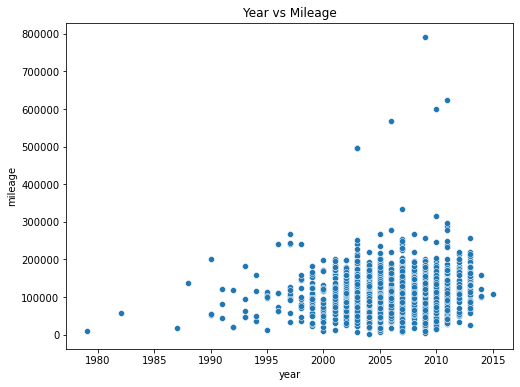

In [32]:
# mileage vs engine capacity
plt.figure(figsize=(8,6))
plt.title('Year vs Mileage')
sns.scatterplot(x='year',y='mileage', data=df)
plt.show()

# Multi Variate Analysis

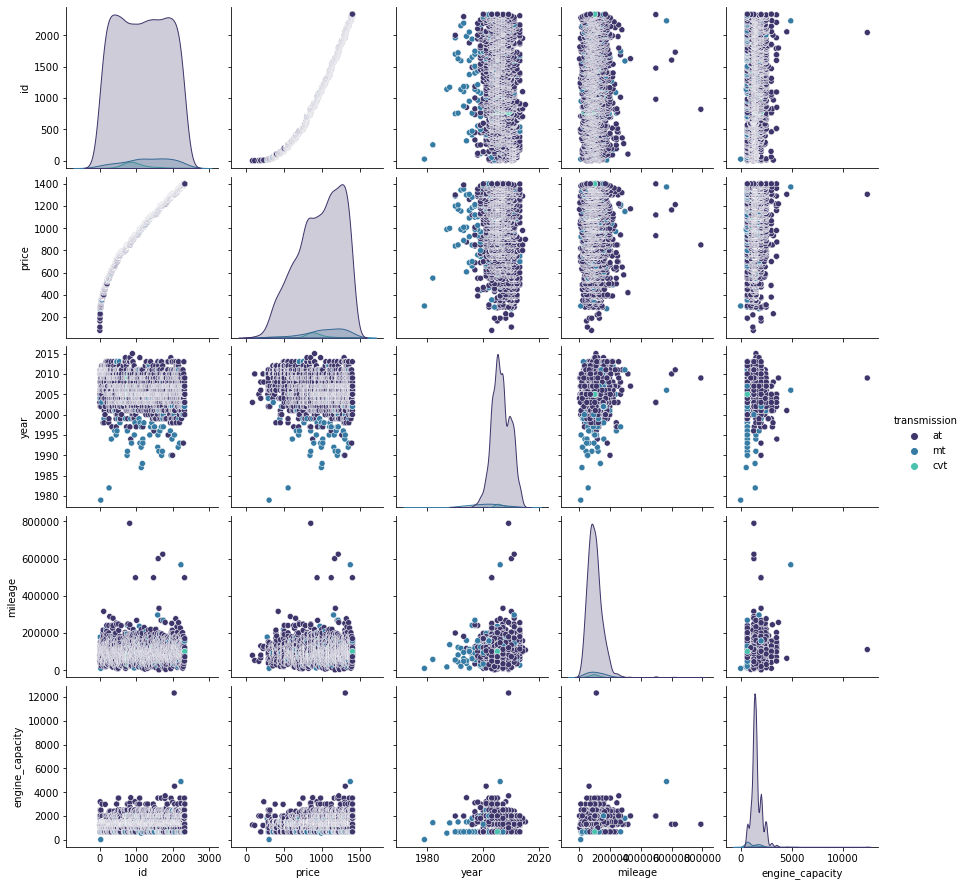

In [33]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="transmission", palette="mako")
plt.show()

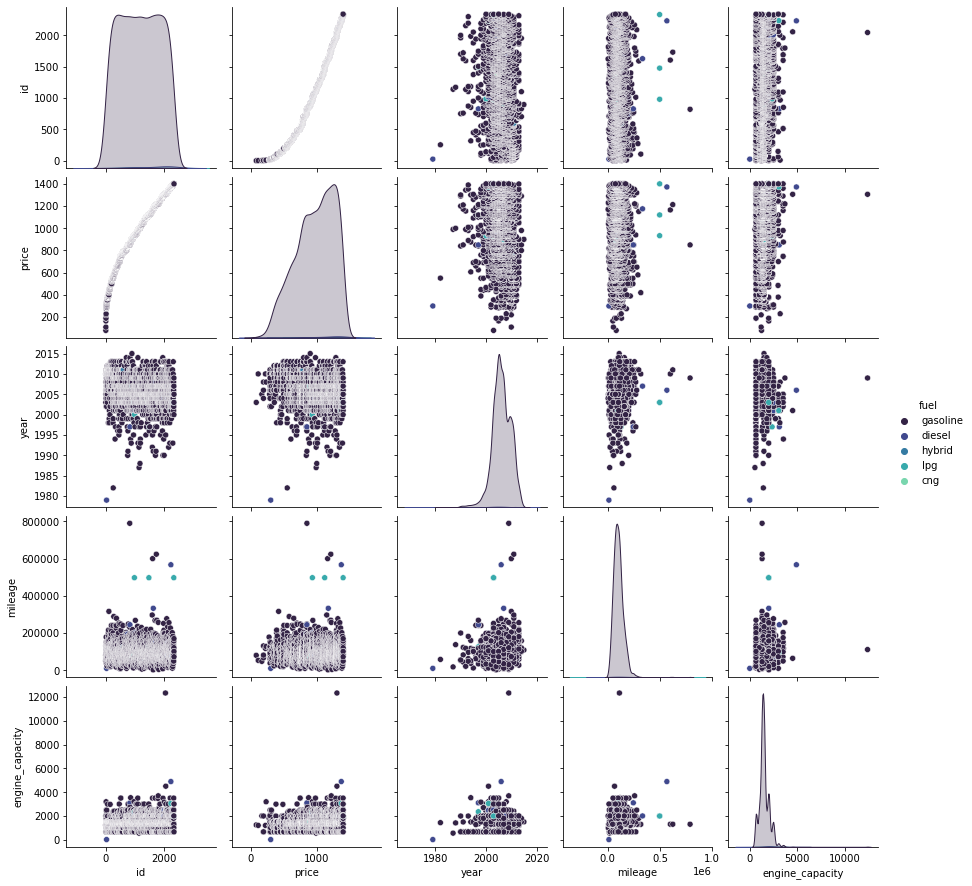

In [34]:
sns.pairplot(df,hue="fuel", palette="mako")
plt.show()

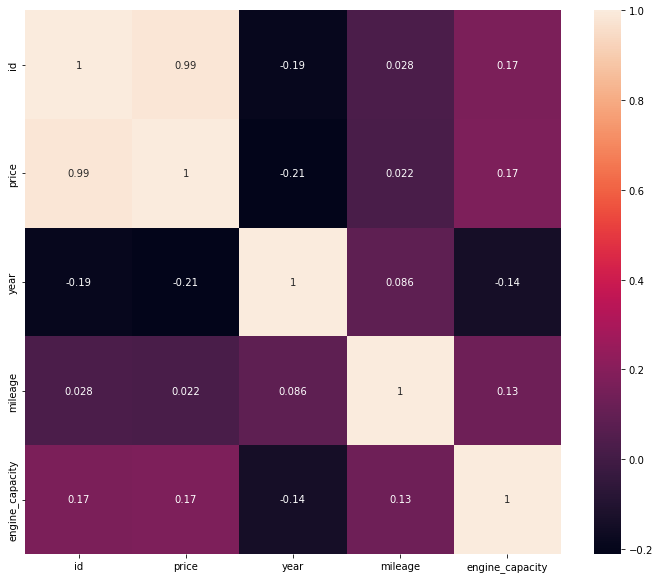

In [35]:
# Checking the correlation between independant columns  and dependant columns 
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Obsrervations:
1. The heatmap contains positive and negative correlation
2. Most of the columns showcorrelation around 0
3. the column year shows a negative correlation with the price of the car. This means that as the year increases the price decreases and vice-versa .
4. Similarly there is a negative correlation between the year and the engine capacity.
5. The cars which are older have a lower engine capacity

In [36]:
correlation =df.corr()

In [37]:
correlation['price'].sort_values(ascending=False)

price              1.000000
id                 0.985100
engine_capacity    0.173748
mileage            0.021581
year              -0.211092
Name: price, dtype: float64

The year column has a negativ ecorrelation wit the price column

# Dropping columns that are irrelevant

In [38]:
# Dropping the ID column
df.drop('id',axis=1, inplace=True)

In [39]:
df.head(1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline


# Identifying the outliers and removing them

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box plot of the price column'}, xlabel='price'>

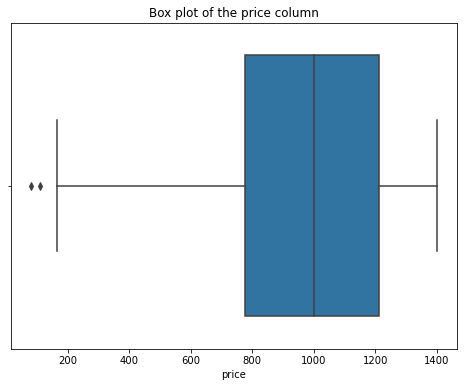

In [40]:
# Checking the outliers in price column
plt.figure(figsize=(8,6))
plt.title('Box plot of the price column')
sns.boxplot(df['price'])

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box plot of the year column'}, xlabel='year'>

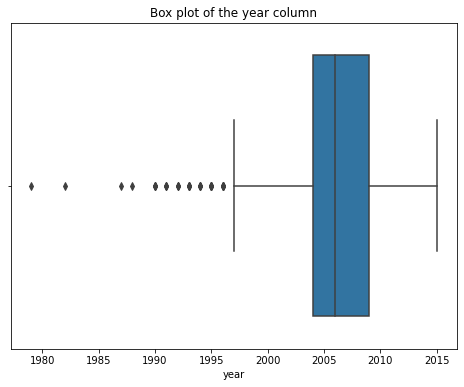

In [41]:
# Checking the outliers in year column
plt.figure(figsize=(8,6))
plt.title('Box plot of the year column')
sns.boxplot(df['year'])

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box plot of the mileage column'}, xlabel='mileage'>

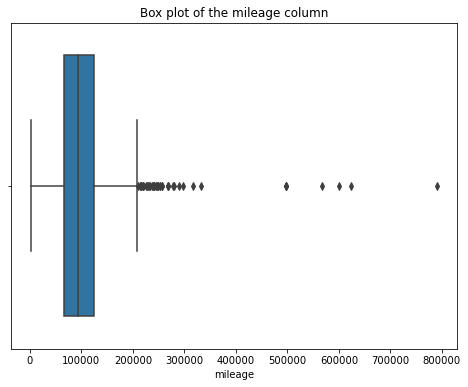

In [42]:
# Checking the outliers in mileage column
plt.figure(figsize=(8,6))
plt.title('Box plot of the mileage column')
sns.boxplot(df['mileage'])

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box plot of the engine_capacity column'}, xlabel='engine_capacity'>

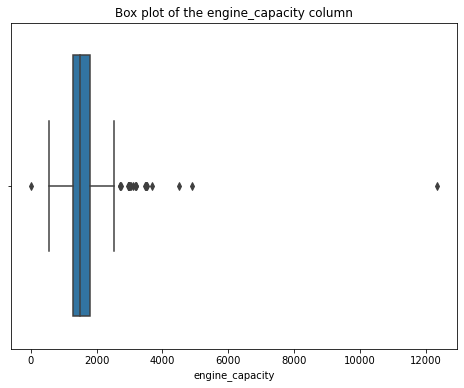

In [43]:
# Checking the outliers in engine_capacity column
plt.figure(figsize=(8,6))
plt.title('Box plot of the engine_capacity column')
sns.boxplot(df['engine_capacity'])

# Removing outliers from columns

There are 2 ways to remove the outliers IQR and z-score method

Trying both methods and finding data loss

In [44]:
cols = df[['mileage','engine_capacity','year']]

## IQR Method

In [45]:
# 1st quantile
Q1 = cols.quantile(0.25)
# 3rd quantile
Q3 = cols.quantile(0.75)
# IQR
IQR = Q3 - Q1
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\bhanu\AppData\Local\Temp/ipykernel_8044/192968219.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [46]:
df.shape

(2318, 10)

In [47]:
df_iqr.shape

(2199, 10)

In [48]:
#Checking the dataloss percentage
data_loss = (2318-2270)/2318*100
data_loss

2.070750647109577

There is a 2% data loss when we use the IQR method

## Z-Score method

In [49]:
# Using zscore to remove outliers
from scipy.stats import zscore
zs=np.abs(zscore(cols))
df_zs = df[(zs<3).all(axis=1)]
df_zs.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [50]:
df.shape

(2318, 10)

In [51]:
df_zs.shape

(2263, 10)

In [52]:
#Checking the dataloss percentage
data_loss = (2318-2301)/2318*100
data_loss

0.7333908541846419

There is only a 0.7% dataloss with Z-score method

So we use the dataframe created after using the z-score method

# Checking the skewness

In [67]:
df_zs.skew()

C:\Users\bhanu\AppData\Local\Temp/ipykernel_8044/3920528495.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_zs.skew()


price             -0.454565
year              -0.142826
mileage            0.601761
engine_capacity    0.608483
dtype: float64

# Endoding the data 

In [54]:
cols = ["mark", "model", "transmission", "drive",'hand_drive','fuel']

In [55]:
df_iqr.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [68]:
df_zs=pd.get_dummies(df_zs, drop_first =True)

In [69]:
df_zs.sample(5)

,price,year,mileage,engine_capacity,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,...,model_zest,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
1756,1220,2007,167000,2490,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1638,1190,2005,86000,1000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2161,1353,2005,105804,1300,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1887,1267,2007,130357,1290,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
420,681,2004,42692,1500,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [70]:
df = df_zs.copy()

In [71]:
X = df.drop('price',axis = 1)

In [72]:
y = df['price']

In [73]:
X

,year,mileage,engine_capacity,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,mark_honda,...,model_zest,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,2003,80000,1240,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2010,53000,1200,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2005,47690,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2008,130661,1990,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2006,66300,660,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2009,121000,996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2314,2003,101000,3000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2315,2005,101000,660,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2316,2000,170000,660,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [74]:
y

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2263, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train_Test Split

In [77]:
from sklearn.model_selection import train_test_split

# Finding the best Random State

In [82]:
from sklearn.ensemble import RandomForestRegressor
score=[]
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3, random_state =i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    score.append(rfr.score(X_test, y_test))

results = pd.DataFrame({'random_state':i, 'score':score})
results[results['score'] == results['score'].max()]

,random_state,score
80,199,0.370418


In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=199)

# Random Forest Regression

In [92]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.3123987454843081